# APPM 4570/5570 Fall 2018 Project

Instructions: Answer each part of the following questions. You are permitted to collaborate with classmates, but you should ${\bf not}$ copy code or answers from anyone. All work should be your own (perhaps influenced by collaborations). Some questions will require some outside research. I am here to help!

Note that some questions require you to write out explanations and equations. I ${\bf \text{do not}}$ want these parts written by hand and turned in separately. Part of the goal of this project is for you to learn to write (very basic) LaTeX equations in the Markdown cells here in Jupyter (if you haven't done so already). Please see the following link for a tutorial: http://data-blog.udacity.com/posts/2016/10/latex-primer/.

This project will be submitted electronically to Canvas no later than ${\bf \text{Wednesday, May 2.}}$

## Problem 1

#### (a) Load the diabetes dataset (for information about this data set, see https://www.rdocumentation.org/packages/faraway/versions/1.0.7/topics/diabetes).   Construct a new data frame with the stabilized glucose, gender, and frame variables. Report summary statistics. Based on those summaries, further clean the data as necessary.  Use this new data frame on all additional parts of this question.


In [15]:
data = data.frame(read.table("diabetes.txt"))
colNames = c("stab.glu","gender","frame")
data = data[,which((names(data1) %in% colNames)==TRUE)]
data = data[complete.cases(data),]
summary(data)

    stab.glu        gender       frame    
 Min.   : 48.0   female:227   large :103  
 1st Qu.: 81.0   male  :164   medium:184  
 Median : 89.0                small :104  
 Mean   :106.5                            
 3rd Qu.:106.0                            
 Max.   :385.0                            

#### (b) Print a boxplot of the stabalized glucose, conditioning on gender. Comment on each distribution. Visually, do you see a difference between the mean stabalized glucose among males and the mean stabalized glucose among females?

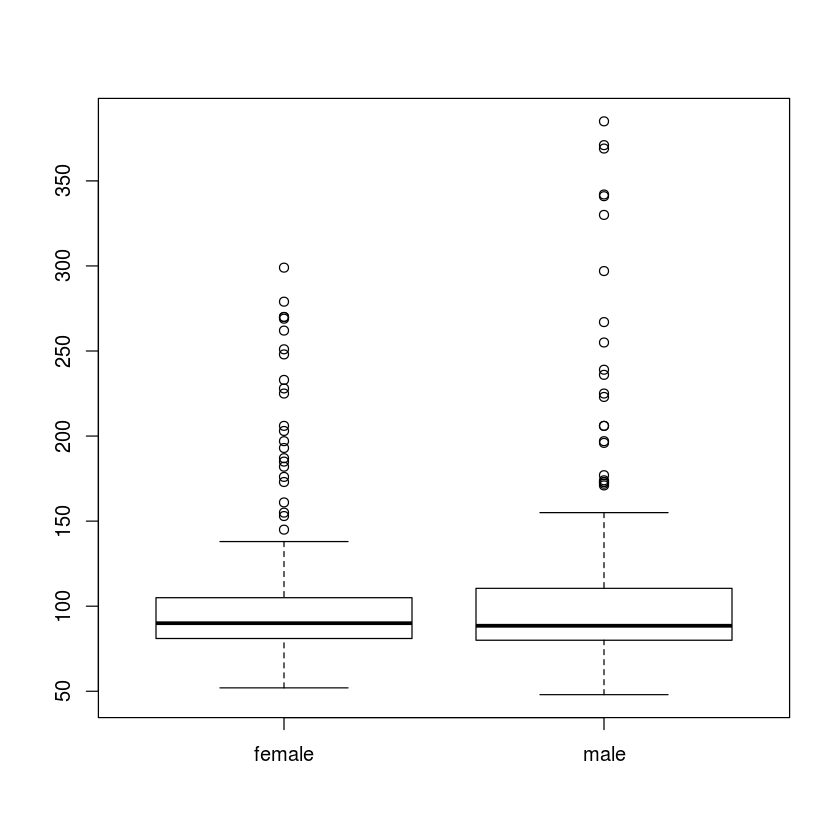

In [22]:
boxplot(stab.glu ~ gender, data=data)
"They have the same mean"
"But the male data has larger outliers on the upper end, skewing the upper quartile higher than the female's"

#### (c) Formally test the hypothesis that there is no difference in mean stable glucose across males and females. Report the p-value and what hypothesis you would act as though is true.

In [44]:
"H0: MuM == MuF"
"H1: MuM != MuF"

Ms = data[data$gender == 'male',]
Fs = data[data$gender == 'female',]

xbar = mean(Ms$stab.glu)
ybar = mean(Fs$stab.glu)
sd1 = sd(Ms$stab.glu)^2
sd2 = sd(Fs$stab.glu)^2
n1 = length(Ms)
n2 = length(Fs)

t.test(Ms$stab.glu, Fs$stab.glu)

"Using a signifigance level of 5%, we can reject the null hypothesis"

[1] "H0: MuM == MuF"

[1] "H1: MuM != MuF"


	Welch Two Sample t-test

data:  Ms$stab.glu and Fs$stab.glu
t = 1.5712, df = 270.59, p-value = 0.1173
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.294434 20.429440
sample estimates:
mean of x mean of y 
 111.7988  102.7313 


[1] "Using a signifigance level of 5%, we can reject the null hypothesis"

#### (d) Is the confidence interval for the difference in means consistent with the result of the test? Explain.

In [45]:
"Yes, that confidence interval's range is very large, meaning the difference between the two means is likely not 0"

[1] "Yes, that confidence interval's range is very large, meaning the difference between the two means is likely not 0"

#### (e) Now, construct a boxplot of stable gluecose, conditioning on frame. Comment on each distribution. Visually, do you see a difference between the mean stabalized glucose among people of different frame sizes?

[1] "The distribution of frame to stab.glu is an F distribution, \n with the peak off to one side and diminishing outliers on the other"

[1] "As the frame size increases, so does the mean of stab.glu"

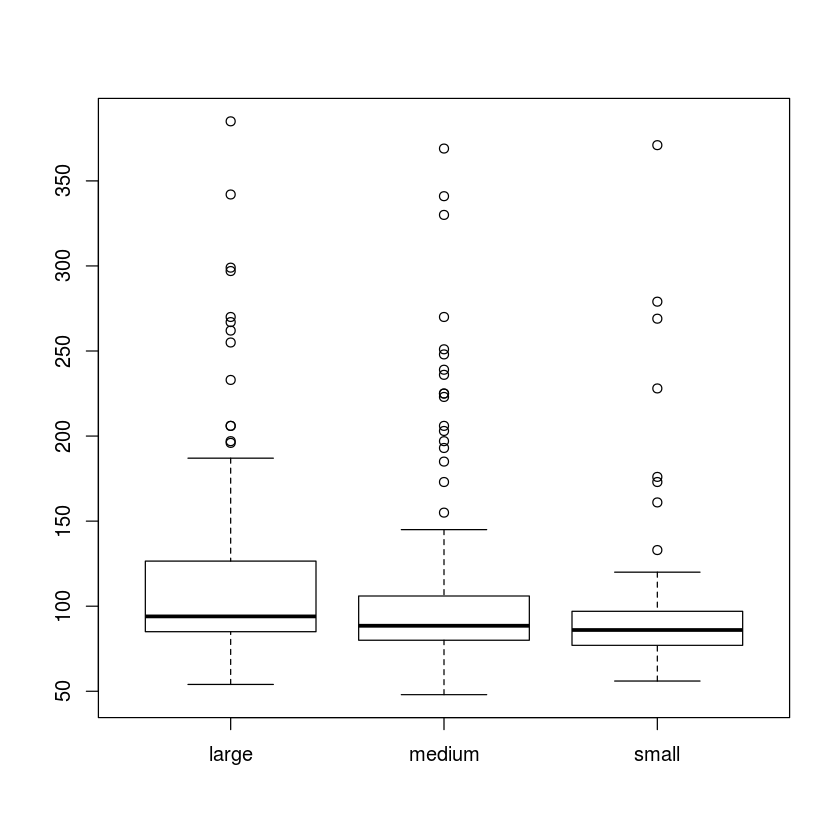

In [52]:
boxplot(stab.glu ~ frame, data=data)
"The distribution of frame to stab.glu is an F distribution, 
 with the peak off to one side and diminishing outliers on the other"
"As the frame size increases, so does the mean of stab.glu"

(f) Let's now conduct an analysis to more formally decide whether there is difference among means of stable gluecose across people of different frame sizes (the technique that we will use is called Analysis of Variance (ANOVA)). We fit a linear model 

\begin{equation}
Y_i = \beta_0 + \beta_1X_{i,m} + \beta_2X_{i,s} + \varepsilon_i, \,\,\, i = 1,...,n \,\,\,\,\,\,\,\ (1)
\end{equation}

where

1. $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$;

2. $
 X_{i,m}= 
\begin{cases}
1 \,\,\, \text{ if the } i^{th} \text{ measurement is in the "medium" group.} \\
0 \,\,\, \text{otherwise}
\end{cases};
$

3. $
 X_{i,s}= 
\begin{cases}
1 \,\,\, \text{ if the } i^{th} \text{ measurement is in the "small" group.} \\
0 \,\,\, \text{otherwise}
\end{cases};
$
and
4. $Y_i$ is the $i^{th}$ measurement of stable glucose.

 
#### (i) Write down the model for stable glucose for individuals in the large framed group.

#### (ii) Fit the model in equation (1) above. [HINT: The easiest way to do this is something like ${\tt lm(response \sim predictor, data = data)}$, where the predictor is the categorical variable in the dataset.] Is there a statistically significant difference among means of stable glucose across people of different frame sizes?

In [81]:
lmod = lm(stab.glu ~ frame == 'small', data=data)
summary(lmod)


Call:
lm(formula = stab.glu ~ frame == "small", data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.362 -26.362 -16.971   1.638 275.029 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           110.362      3.126  35.309   <2e-16 ***
frame == "small"TRUE  -14.391      6.060  -2.375   0.0181 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.95 on 389 degrees of freedom
Multiple R-squared:  0.01429,	Adjusted R-squared:  0.01175 
F-statistic: 5.639 on 1 and 389 DF,  p-value: 0.01805


#### (iii) What is the mean stable glucose value for a person with a large frame? Medium frame? How much higher or lower is the stable glucose of a small framed person than a large framed person?

## Problem 2

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Each variable measured reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries. These variables currently include: real GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. Each country is also compared against a hypothetical nation called Dystopia. Dystopia represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark.


#### (a) Read in the World Happiness Report data.


#### (b) Load the ${\tt ggplot2 }$ and ${\tt ggcorrplot }$  libraries. Construct a correlation matrix consisting of the happiness score, GDP, Family, life expectancy, freedom, generosity, and trust government corruption (you can do this with the ${\tt corr()}$ function). Then, use that correlation matrix in the ${\tt ggcorrplot}$ function to create a visually pleasing correlation plot. Comment on the relationships between these variables.

#### (c) Construct a multiple linear regression model where the happiness score is the response, and the remaining variables used in (b) as predictors. Print a summary of this model. 

#### (d) What is the percent of variability in happiness score that can be explained by GDP, Family, life expectancy, freedom, generosity, and trust government corruption?

#### (e) Predict the happiness score for a country with (sample) average values for GDP, Family, life expectancy, freedom, generosity, and trust government corruption. 

#### (f) Interpret the coefficient associated with life expectancy.

#### (g) Assess the multiple linear regression assumptions. Are any of them violated with this dataset? One way to do this is plot the model you created in part (c). 

#### (h) Consider the reduced model with only GDP, life expectancy, and freedom. Is this model sufficient? Base your answer on some formal measure of "sufficient".

Collinearity is sometimes a problem in regression. Collinearity occurs when predictors in a model are correlated. In a multiple regression model with correlated predictors, estimators/coefficients may change erratically in response to small changes in the model or the data. One measure of collinearity is called the *variance inflation factor*. For each predictor in the model, define

$$VIF_j = \frac{1}{1-R_j^2},$$

where $R_j^2$ is the coefficient of determination for the model where the $j^{\text{th}}$ predictor is regressed against all the other predictors. The idea is that, if the $j^{\text{th}}$ predictor has a strong linear relationship with the other predictors, $R_j^2$ would be close to 1, and the variance inflation factor would be large. A rule of thumb is that, if $VIF_j >10$, collinearity might be a problem worthy of further investigation. (How do you investigate further? Take STAT 5010 in spring 2019 to find out!).

#### (i) Load the ${\tt car}$ library into R and use the ${\tt vif()}$ function to decide whether collinearity is a problem for the full regression model fit above.

## Problem 3

In this question, we will explore a method for fitting a regression model where the predictor variable is partitioned into intervals, and on each interval, a different linear relationship exists between the predictor and response. We are interested in fitting separate line segments to each interval such that the overall model is a continuous function.



#### (a) Load the ${\tt plant}$ dataset into R. Plot measurements of the plant organ, $y$, as a function of time, ${\tt time}$, using colors to differentiate attributes of the plant organ, ${\tt group}$.  


Notice that, conditioned on RKV, the time variable seems to be partitioned into two groups: a group where time is less than 400, and a group where time is greater than 400. We will fit the following model:

$$Y_i = \beta_0 + \beta_1f_1(X_i) + \beta_2f_2(X_i) + \varepsilon_i, \,\,\, i = 1,...,n, \,\,\,\,\,\, (1) $$

where:

1. $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$;

2. $
f_1(X) = 
\begin{cases}
400 - X \,\,\, \text{ if }  \,\,\, X \le 400 \\
0 \,\,\, \text{otherwise}
\end{cases};
$

3. $
f_2(X) = 
\begin{cases}
 X - 400 \,\,\, \text{ if }  \,\,\, X \ge 400 \\
0 \,\,\, \text{otherwise}
\end{cases};
$

4. $X$ is the time variable for group RKV; and

5. $Y$ is the measurement variable for group RKV.

#### (b) This model fits separate lines to the data before and after the "change point" of $400$. Write R code for the functions $f_1(x)$ and $f_2(x)$. 

#### (c) Using the model in (1), write down the equation of the line that is fit to the data to the left of the change point. Write down the equation of the line that is fit to the data to the right of the change point. Justify your answers.

#### (d) Fit the model in (1) in R, and print a summary. Should you exclude any of the (transformed) predictors from the model? Would a model with just an intercept be sufficient? Explain why or why not?

#### (e) Plot the model over the scatterplot of the data. Comment on the fit.

#### (f) Plot the residuals against the fitted values. Comment on this plot. 

## Problem 4

In this class, we used the *frequentist* (or *classical*) paradigm in statistics to make inferences about a population parameter based on sample information. Many have criticized this paradigm, and much of that criticism comes from so-called *Bayesian* statisticians. The Bayesian paradigm provides another way for us to make inferences about a population parameter based on sample information. In this question, we will explore the differences in these paradigms, and learn a bit about the Bayesian paradigm.


#### (a) Conduct some research on the differences between the frequentist and Bayesian statistical paradigms, and summarize your research here (a few paragraphs will be necessary). [This article](https://plato.stanford.edu/entries/statistics/#ClaSta) might be a nice start. In particular, what do the differences here have to do with *conceptual/philosophical* issues (rather than *empirical/scientific* issues)? What do the differences have to do with the interpretation of probability theory?

As you've (hopefully) noted above, Bayesians assign a posterior probability distrubution to values of a parameter, given sample information. From this posterior, we can find point estimates (e.g., the mean of the posterior) and interval estimates (intervals along the posterior distribution containing the parameter with a specified probability). 

Consider $n = 15$ independent flips of a coin. The probability of heads, $p$, is unknown to us, and we'd like to infer something about it. We can do this with Bayes' theorem! Let $X_1,...,X_n$ represent our flips ($X_i = 1$ if heads, 0 if tails). Bayes' theorem states that:

$$\pi( p \, | \, X_1,...,X_n) = \frac{L( X_1,...,X_n \, | \, p)\pi(p)}{\pi(X_1,...,X_n)},$$ 

where $\pi( p \, | \, X_1,...,X_n)$ is the posterior probability distribution for $p$ given the data, $L( X_1,...,X_n \, | \, p)$ is the likelihood function for the data, $\pi(p)$ is the prior probability distribution on $p$, and $\pi(X_1,...,X_n)$ is the "evidence" (which can be calculated using the law of total probability). 

Let's construct a simplified version of Bayesian inference.

#### (b) First, descretize the parameter space by making a grid of $m = 100$ values for $p$ between 0 and 1. Then, create a vector of prior probabilities that assigns equally likely probabilities to each value of $p$.

#### (c) We flip the coin 15 times, and count 4 heads. Calculate the probability of getting 4 heads in 15 tosses under each value of $p$  given above. These are values of the likelihood function.

#### (d) Use Bayes' theorem and the information from previous parts to calculate the posterior distribution for each of the 100 values of $p$. Plot and describe the posterior distribution. In particular, does it look like a distribution that we've studied in class?

#### (e) Find a reasonable point estimate for $p$. A $(1-\alpha)\times 100\%$ *Bayesian credible interval* is a range of values within which the parameter value falls with probability $1 - \alpha$.  Use the posterior distribution found in (d) to find a 95% credible interval for $p$. 

#### (f) Interpret this interval. How does the interpretation compare to the interpretation for a confidence interval for $p$? Which interpretation do you prefer?

## Problem 5 (APPM 5570 Only)

Here, let's redo the previous problem in a more rigorous way. A modified version of Bayes' theorem states that:

$$\pi( p \, | \, X_1,...,X_n) \propto L( X_1,...,X_n \, | \, p)\pi(p),$$ 

where the functions are the same as above, and $\propto$ is read as "proportional to". In some special cases, it is relatively easy to use this version of Bayes' theorem to find the exact form of the posterior probability distribution for $p$.


#### (a) Write down the likelihood function for the coin example. The likelihood is defined as the (joint) pmf/pdf of the data, interpreted as a function of the parameter (in this case, $p$). For some help, see the solutions to homework #8, question 7, where you found a likelihood function for normal iid data.


#### (c) We will use a beta prior distribution on $p$. Write down the pdf of the beta distribution and briefly justify why it is a reasonable choice for a prior distribution in this example. 


#### (d) Compute the posterior distribution, up to the normalizing constant, using Bayes' theorem. This means you can omit all normalizing constants from your calculation. Is this posterior distribution of a particular type (e.g., normal, exponential, beta, binomial, etc.)?


#### (e) Suppose, again, that we flip our coin $n = 15$ times and get 4 heads. Compute,  plot, and interpret the posterior distribution for $p$.

#### (f) Use the properties of the posterior distribution found in (e) to report a point estimate for $p$.

#### (g) A $(1-\alpha)\times 100\%$ *Bayesian credible interval* is a range of values within which the parameter value falls with probability $1 - \alpha$.  Use the posterior distribution found in (e) to find a 95% credible interval for $p$.

#### (h) Interpret this interval. How does the interpretation compare to the interpretation for a confidence interval for $p$? Which interpretation do you prefer?

## Problem 6

So far, in class, we've worked with response variables (dependent variables) that are continuous. In this example, we will work on "logistic regression", which allows us to model a categorical response.

(a) Read in the binary data from https://stats.idre.ucla.edu/stat/data/binary.csv. 

The dataset contains several columns which we can use as predictor variables:

gpa

gre score

rank or prestige of an applicant's undergraduate alma mater

The fourth column, admit, is our binary target variable. It indicates whether or not a candidate was admitted our not.


Store rank and admit as categorical variables/factors. Print a summary of the data. Note anything interesting.

(b) When analyzing a statistical model, it is often useful to use some of the data to train the model and some of the data to test whether the model can make good predictions. Use the sample function to extract 20% of the data as a test set. Store the training data in a data frame called df_train, and the test data in a data frame called df_test.

(c) Using the training data frame, and considering admit as the response with gre and gpa as predictors, run a logistic regression. Logistic regression in R can be run using the function glm(). For the family argument in glm(), use binomial. This specifies the mean model

$$ p = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}, $$

where $p$ is the probability of admittance. 
Report the summary of the logistic regression model. Interpret the coefficient associated with gpa.

(d) Use the model to predict whether the people in the test set were admited to graduate school or not. Then, calculate the accuracy of these predictions. What percent of predictions are correct?